In [2]:
import numpy as np
import pandas as pd

In [3]:
df_train_data = pd.read_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\df_train_data.csv")
df_train_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
0,M1189,1,43,3,7,0,876.645,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,M3864,1,63,4,12,0,748.440,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M7957,1,29,9,17,0,1883.945,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M2413,0,50,4,7,0,874.860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M3528,1,51,3,12,0,7.770,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test_data = pd.read_csv(r"C:\Users\SHIVAM MAHAJAN\Desktop\Github\EXL data\df_test_data.csv")
df_test_data.head()

,Account Number,Gender,Age,Salary Slab,Age of Home,Churners,Sum,payment_complaint,account_complaint,utility_complaint,...,Region _Western,Accounting,Academics,Automative,Banking,Defence,Finance,Pharma,Labour,Others
0,M9773,1,51,4,17,0,748.230,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M3396,1,51,4,17,0,769.125,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M7889,1,62,6,17,0,839.895,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,M3423,0,50,4,21,0,7.770,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4624,1,51,4,17,0,637.035,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_acc_nums, test_acc_nums = df_train_data["Account Number"].values, df_test_data["Account Number"].values
ytrain, ytest = df_train_data["Churners"].values, df_test_data["Churners"].values
yidx = np.where(np.array(df_train_data.columns) == "Churners")[0][0]
Xtrain = pd.concat([df_train_data.iloc[:,1:yidx], df_train_data.iloc[:,yidx+1:]],axis = 1).values
Xtest = pd.concat([df_test_data.iloc[:,1:yidx], df_test_data.iloc[:,yidx+1:]], axis = 1).values

In [6]:
df_train_data.iloc[:,1:7].corr()

,Gender,Age,Salary Slab,Age of Home,Churners,Sum
Gender,1.000000,0.023842,-0.006895,0.051388,-0.005693,-0.008937
Age,0.023842,1.000000,0.083658,0.296768,-0.042624,-0.032991
Salary Slab,-0.006895,0.083658,1.000000,0.278051,-0.037803,0.022125
Age of Home,0.051388,0.296768,0.278051,1.000000,-0.052292,-0.050769
Churners,-0.005693,-0.042624,-0.037803,-0.052292,1.000000,-0.019940
Sum,-0.008937,-0.032991,0.022125,-0.050769,-0.019940,1.000000


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain_std, Xtest_std = sc.transform(Xtrain), sc.transform(Xtest)
Xtrain_std

array([[ 0.81931607, -0.58032731, -0.78282149, ..., -0.12257321,
        -0.03361885, -0.08925026],
       [ 0.81931607,  1.00507734, -0.21968732, ..., -0.12257321,
        -0.03361885, -0.08925026],
       [ 0.81931607, -1.69011056,  2.59598355, ..., -0.12257321,
        -0.03361885, -0.08925026],
       ..., 
       [-1.22053019,  0.9258071 , -1.90908983, ..., -0.12257321,
        -0.03361885, -0.08925026],
       [-1.22053019,  1.08434757,  0.90658103, ..., -0.12257321,
        -0.03361885, -0.08925026],
       [-1.22053019,  1.00507734, -0.78282149, ..., -0.12257321,
        -0.03361885, -0.08925026]])

### K-Nearest Neighbor Algorithm

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(Xtrain_std,ytrain)
ypred = knn.predict(Xtest_std)
np.sum(ypred)

97.0

In [11]:
accuracy_score(np.zeros(len(ytest)), ytest)

0.95235707121364088

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred)

array([[1811,   88],
       [  86,    9]])

In [13]:
from sklearn.metrics import f1_score
f1_score(ytest, ypred)

0.093749999999999986

In [18]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "n_neighbors" : range(1,30),
    "weights" : ["uniform", "distance"],
    "p" : [1,2]
}
grid = RandomizedSearchCV(knn,param_grid,cv=10, scoring="roc_auc")
grid.fit(Xtrain_std,ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [19]:
grid.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.58958, std: 0.03861, params: {'p': 2, 'weights': 'distance', 'n_neighbors': 19},
 mean: 0.60594, std: 0.02944, params: {'p': 1, 'weights': 'uniform', 'n_neighbors': 28},
 mean: 0.58361, std: 0.03012, params: {'p': 2, 'weights': 'distance', 'n_neighbors': 15},
 mean: 0.57602, std: 0.04089, params: {'p': 1, 'weights': 'uniform', 'n_neighbors': 12},
 mean: 0.59895, std: 0.03711, params: {'p': 2, 'weights': 'distance', 'n_neighbors': 23},
 mean: 0.58188, std: 0.03400, params: {'p': 1, 'weights': 'distance', 'n_neighbors': 20},
 mean: 0.57109, std: 0.03688, params: {'p': 2, 'weights': 'distance', 'n_neighbors': 11},
 mean: 0.56204, std: 0.03256, params: {'p': 2, 'weights': 'distance', 'n_neighbors': 8},
 mean: 0.59888, std: 0.02833, params: {'p': 1, 'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.53000, std: 0.02889, params: {'p': 2, 'weights': 'uniform', 'n_neighbors': 2}]

In [20]:
grid.best_params_

{'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}

In [21]:
grid.best_score_

0.60593652184776925

In [22]:
from sklearn.preprocessing import binarize
from sklearn import metrics

In [23]:
knn = KNeighborsClassifier(n_neighbors=27, p = 2, weights= "uniform")
knn.fit(Xtrain_std, ytrain)
ypred_prob = knn.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob)

0.60716720711731942

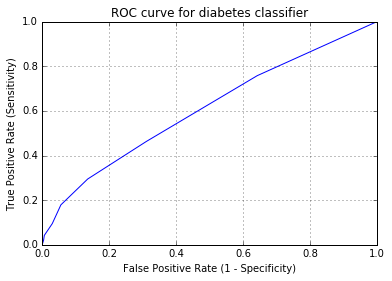

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
tpr, fpr, thresholds = metrics.roc_curve(ytest, ypred_prob)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [25]:
def evaluate_score(threshold, ypred_prob):
    ypred_class = binarize([ypred_prob],threshold)
    ypred = ypred_class[0]
    confusion = confusion_matrix(ytest,ypred)
    tpr = confusion[1,1]/float(confusion[1,1] + confusion[1,0])
    fpr = confusion[0,1]/float(confusion[0,1] + confusion[0,0])
    print "Senstivty :", tpr
    print "Specificity :", 1-fpr
    print "F1-Score :", metrics.f1_score(ytest,ypred)
    print "Confusion Matrix :"
    print confusion

In [26]:
evaluate_score(0.038,ypred_prob)

Senstivty : 0.463157894737
Specificity : 0.6887835703
F1-Score : 0.120547945205
Confusion Matrix :
[[1308  591]
 [  51   44]]


In [27]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.045860
std         0.051569
min         0.000000
25%         0.000000
50%         0.037037
75%         0.074074
max         0.333333
dtype: float64

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [29]:
param_grid = {
    "C" : [0.0001,0.003,0.01,0.03,0.1,0.3,1,3,10],
    "penalty" : ["l1", "l2"]
}
rand_cv = RandomizedSearchCV(lr, param_grid, cv = 10, scoring = "roc_auc")
rand_cv.fit(Xtrain_std, ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [30]:
rand_cv.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50000, std: 0.00000, params: {'penalty': 'l1', 'C': 0.0001},
 mean: 0.68154, std: 0.04569, params: {'penalty': 'l2', 'C': 0.0001},
 mean: 0.50000, std: 0.00000, params: {'penalty': 'l1', 'C': 0.003},
 mean: 0.67393, std: 0.04437, params: {'penalty': 'l2', 'C': 0.3},
 mean: 0.63515, std: 0.03724, params: {'penalty': 'l1', 'C': 0.01},
 mean: 0.67396, std: 0.04416, params: {'penalty': 'l1', 'C': 3},
 mean: 0.67422, std: 0.03944, params: {'penalty': 'l1', 'C': 0.03},
 mean: 0.67710, std: 0.04454, params: {'penalty': 'l2', 'C': 0.03},
 mean: 0.67376, std: 0.04416, params: {'penalty': 'l1', 'C': 10},
 mean: 0.67489, std: 0.04453, params: {'penalty': 'l2', 'C': 0.1}]

In [31]:
rand_cv.best_params_

{'C': 0.0001, 'penalty': 'l2'}

In [32]:
rand_cv.best_score_

0.68153595779820209

In [46]:
lr = LogisticRegression(penalty="l1", C= 0.03)
lr.fit(Xtrain_std, ytrain)
ypred_prob = lr.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob)

0.71255785593525678

In [34]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.055256
std         0.033325
min         0.030154
25%         0.041834
50%         0.046260
75%         0.053356
max         0.405854
dtype: float64

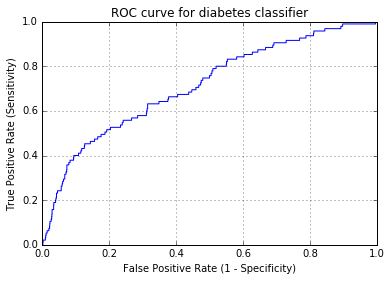

In [35]:
import matplotlib.pyplot as plt
tpr, fpr, thresholds = metrics.roc_curve(ytest, ypred_prob)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [36]:
evaluate_score(0.06,ypred_prob)

Senstivty : 0.431578947368
Specificity : 0.875197472354
F1-Score : 0.219839142091
Confusion Matrix :
[[1662  237]
 [  54   41]]


#### Clearly Logistic is Better than KNN. But we are yet to chose a cutoff.

### SVM

In [31]:
import time

In [47]:
from sklearn.svm import SVC
svm = SVC()
para_grid = {
    "C" : [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3],
    "degree" : [2,3,4,5],
    "kernel" : ["poly"]
}

In [48]:
rand_cv = RandomizedSearchCV(svm, para_grid, scoring = "roc_auc", cv = 10, n_iter=20)
rand_cv.fit(Xtrain_std, ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'kernel': ['poly'], 'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3], 'degree': [2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [49]:
rand_cv.grid_scores_

[mean: 0.53613, std: 0.05633, params: {'kernel': 'poly', 'C': 3, 'degree': 5},
 mean: 0.53344, std: 0.04872, params: {'kernel': 'poly', 'C': 0.1, 'degree': 4},
 mean: 0.53865, std: 0.05428, params: {'kernel': 'poly', 'C': 0.01, 'degree': 3},
 mean: 0.54222, std: 0.03984, params: {'kernel': 'poly', 'C': 0.003, 'degree': 5},
 mean: 0.53413, std: 0.05010, params: {'kernel': 'poly', 'C': 0.003, 'degree': 2},
 mean: 0.54467, std: 0.04933, params: {'kernel': 'poly', 'C': 1, 'degree': 4},
 mean: 0.54058, std: 0.05580, params: {'kernel': 'poly', 'C': 1, 'degree': 5},
 mean: 0.53718, std: 0.05372, params: {'kernel': 'poly', 'C': 0.1, 'degree': 3},
 mean: 0.53946, std: 0.04021, params: {'kernel': 'poly', 'C': 0.01, 'degree': 5},
 mean: 0.52419, std: 0.03925, params: {'kernel': 'poly', 'C': 0.01, 'degree': 2},
 mean: 0.54011, std: 0.05561, params: {'kernel': 'poly', 'C': 1, 'degree': 3},
 mean: 0.54111, std: 0.04492, params: {'kernel': 'poly', 'C': 0.003, 'degree': 4},
 mean: 0.54223, std: 0.0416

In [50]:
rand_cv.best_score_

0.55555734689171621

In [51]:
rand_cv.best_params_

{'C': 3, 'degree': 2, 'kernel': 'poly'}

In [53]:
svm = SVC(C=3, degree = 2, kernel = "poly", probability=True)
svm.fit(Xtrain_std, ytrain)
ypred_prob = svm.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob)

0.4985726559685153

#### Using rbf

In [49]:
from sklearn.svm import SVC
svm = SVC()
para_grid = {
    "C" : [0.01, 0.03, 0.1, 0.3, 1],
    "gamma" : [0.01, 0.03, 0.1, 0.3, 1],
    "kernel" : ["rbf"]
}

In [50]:
rand_cv = RandomizedSearchCV(svm, para_grid, cv = 10, scoring = "roc_auc")
rand_cv.fit(Xtrain_std, ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'kernel': ['rbf'], 'C': [0.01, 0.03, 0.1, 0.3, 1], 'gamma': [0.01, 0.03, 0.1, 0.3, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [51]:
rand_cv.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.58463, std: 0.04571, params: {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.01},
 mean: 0.55997, std: 0.04691, params: {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.1},
 mean: 0.55891, std: 0.04117, params: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.03},
 mean: 0.54461, std: 0.04807, params: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.01},
 mean: 0.54500, std: 0.03206, params: {'kernel': 'rbf', 'C': 0.01, 'gamma': 1},
 mean: 0.55345, std: 0.03848, params: {'kernel': 'rbf', 'C': 0.3, 'gamma': 1},
 mean: 0.55837, std: 0.04786, params: {'kernel': 'rbf', 'C': 0.03, 'gamma': 0.03},
 mean: 0.57041, std: 0.05384, params: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.3},
 mean: 0.57129, std: 0.05376, params: {'kernel': 'rbf', 'C': 0.03, 'gamma': 0.3},
 mean: 0.55400, std: 0.03977, params: {'kernel': 'rbf', 'C': 0.03, 'gamma': 1}]

In [52]:
rand_cv.best_params_

{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}

In [57]:
svm = SVC(C=0.01, gamma = 0.01, kernel = "rbf", probability=True)
svm.fit(Xtrain_std, ytrain)
ypred_prob = svm.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob)

0.56448269172140464

In [58]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.054617
std         0.008934
min         0.019071
25%         0.049455
50%         0.055158
75%         0.060143
max         0.111483
dtype: float64

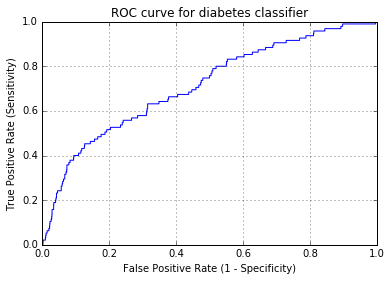

In [48]:
import matplotlib.pyplot as plt
tpr, fpr, thresholds = metrics.roc_curve(ytest, ypred_prob)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [85]:
evaluate_score(0.056,ypred_prob)

Senstivty : 0.505263157895
Specificity : 0.744602422328
F1-Score : 0.152866242038
Confusion Matrix :
[[1414  485]
 [  47   48]]


In [86]:
ypred = binarize([ypred_prob], 0.056)[0]
accuracy_score(ypred, ytest)

0.73319959879638918

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(rf, Xtrain_std, ytrain, cv = 10, scoring = "roc_auc")
scores

array([ 0.62260175,  0.58880178,  0.60290037,  0.60801394,  0.56429862,
        0.56002387,  0.56716996,  0.58539812,  0.59447993,  0.59789973])

In [89]:
scores.mean()

0.58915880695732159

In [91]:
rf.fit(Xtrain_std, ytrain)
ypred_prob = rf.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob)

0.63712480252764614

In [92]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.055401
std         0.098150
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max         0.700000
dtype: float64

### Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, Xtrain_std, ytrain, cv = 10, scoring= "roc_auc")
scores

array([ 0.48826823,  0.49661247,  0.50427475,  0.5171635 ,  0.51505033,
        0.55299071,  0.51709898,  0.51429217,  0.50682346,  0.53187508])

### Neural Network Classifier

In [1]:
from sklearn.neural_network import MLPClassifier

In [97]:
nn = MLPClassifier(hidden_layer_sizes= 100,activation = "relu", alpha = 0.001)
para_grid = {
    "hidden_layer_sizes": [(80,70),(80,80),(80,100),(80,60),(80,90)],
    "alpha" : [3,5,7,8,9]
}

In [98]:
rand_cv = RandomizedSearchCV(nn, para_grid, cv = 10, scoring="roc_auc")
rand_cv.fit(Xtrain_std, ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': [3, 5, 7, 8, 9], 'hidden_layer_sizes': [(80, 70), (80, 80), (80, 100), (80, 60), (80, 90)]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [75]:
import winsound
Freq = 2500 # Set Frequency To 2500 Hertz
Dur = 1000 # Set Duration To 1000 ms == 1 second
winsound.Beep(Freq,Dur)

In [99]:
rand_cv.grid_scores_

C:\Users\SHIVAM MAHAJAN\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.68511, std: 0.04792, params: {'alpha': 7, 'hidden_layer_sizes': (80, 80)},
 mean: 0.68687, std: 0.04470, params: {'alpha': 3, 'hidden_layer_sizes': (80, 80)},
 mean: 0.68542, std: 0.04976, params: {'alpha': 8, 'hidden_layer_sizes': (80, 90)},
 mean: 0.68732, std: 0.04599, params: {'alpha': 7, 'hidden_layer_sizes': (80, 70)},
 mean: 0.68685, std: 0.04588, params: {'alpha': 3, 'hidden_layer_sizes': (80, 90)},
 mean: 0.68421, std: 0.04798, params: {'alpha': 9, 'hidden_layer_sizes': (80, 90)},
 mean: 0.68230, std: 0.04938, params: {'alpha': 8, 'hidden_layer_sizes': (80, 80)},
 mean: 0.68408, std: 0.04655, params: {'alpha': 9, 'hidden_layer_sizes': (80, 100)},
 mean: 0.68471, std: 0.04899, params: {'alpha': 8, 'hidden_layer_sizes': (80, 60)},
 mean: 0.68617, std: 0.04646, params: {'alpha': 5, 'hidden_layer_sizes': (80, 90)}]

In [100]:
rand_cv.best_score_

0.68732039993503091

In [101]:
rand_cv.best_params_

{'alpha': 7, 'hidden_layer_sizes': (80, 70)}

In [111]:
from sklearn.cross_validation import cross_val_score

In [118]:
nn = MLPClassifier(hidden_layer_sizes= (80,70),activation = "relu", alpha = 7)
nn.fit(Xtrain_std, ytrain)
ypred_prob = nn.predict_proba(Xtest_std)[:,1]
metrics.roc_auc_score(ytest, ypred_prob)

0.70677364818048283

In [119]:
pd.Series(ypred_prob).describe()

count    1994.000000
mean        0.055755
std         0.004401
min         0.046417
25%         0.053048
50%         0.054913
75%         0.057426
max         0.082958
dtype: float64

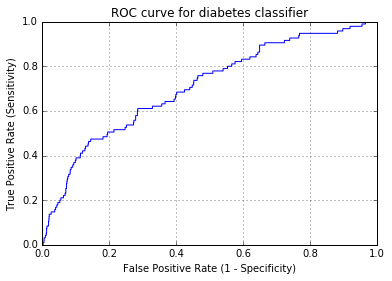

In [120]:
import matplotlib.pyplot as plt
tpr, fpr, thresholds = metrics.roc_curve(ytest, ypred_prob)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [129]:
evaluate_score(0.056,ypred_prob)

Senstivty : 0.631578947368
Specificity : 0.642443391259
F1-Score : 0.143884892086
Confusion Matrix :
[[1220  679]
 [  35   60]]


### Final Predictions